In [2]:
import numpy as np
import pandas as pd
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

## Prepare Data


In [3]:
train_healthy = [cv2.imread(file) for file in glob.glob("dataset/spiral/training/healthy/*.png")]
train_healthy_labels = [0 for _ in range(len(train_healthy))]
train_parkinson = [cv2.imread(file) for file in glob.glob("dataset/spiral/training/parkinson/*.png")]
train_parkinson_labels = [1 for _ in range(len(train_parkinson))]
test_healthy = [cv2.imread(file) for file in glob.glob("dataset/spiral/testing/healthy/*.png")]
test_healthy_labels = [0 for _ in range(len(test_healthy))]
test_parkinson = [cv2.imread(file) for file in glob.glob("dataset/spiral/testing/parkinson/*.png")]
test_parkinson_labels = [1 for _ in range(len(test_parkinson))]

train_images = train_healthy + train_parkinson
test_images = test_healthy + test_parkinson
train_labels = train_healthy_labels + train_parkinson_labels
test_labels = test_healthy_labels + test_parkinson_labels

Edge detection is a fundamental image processing technique used to identify the boundaries within an image. The edges in an image represent significant changes in intensity or color and often correspond to object boundaries or other features of interest. Edge detection plays a crucial role in various computer vision tasks such as object detection, image segmentation, and feature extraction.

Here's an overview of four commonly used edge detection methods:

1. **Roberts Cross Operator**:

   - The Roberts operator is a simple edge detection algorithm that uses a pair of 2x2 convolution kernels to compute the gradient approximation in the horizontal and vertical directions.
   - It calculates the gradient magnitude at each pixel by computing the square root of the sum of squares of the horizontal and vertical gradient components.
   - The operator is sensitive to noise due to its small kernel size, and it can produce thin edges with a high response to diagonal edges.

2. **Sobel Operator**:

   - The Sobel operator is a more sophisticated edge detection algorithm that applies convolution with a pair of 3x3 kernels to compute the gradient approximation in the horizontal and vertical directions.
   - It calculates the gradient magnitude and direction at each pixel by convolving the image with the Sobel kernels.
   - The Sobel operator is less sensitive to noise compared to the Roberts operator and produces thicker edges with a smoother response to edges.

3. **Scharr Operator**:

   - The Scharr operator is similar to the Sobel operator but uses a different set of convolution kernels designed to provide better rotation invariance and directional accuracy.
   - It offers improved edge detection performance compared to the Sobel operator, especially for images with diagonal edges or when detecting edges at non-cardinal orientations.

4. **Prewitt Operator**:
   - The Prewitt operator is another edge detection algorithm that operates similarly to the Sobel operator but uses a different set of 3x3 convolution kernels.
   - It computes the gradient magnitude and direction to detect edges in the horizontal and vertical directions.
   - The Prewitt operator is less computationally intensive than the Sobel operator but may produce similar results in edge detection tasks.

These edge detection methods differ in their computational complexity, sensitivity to noise, and ability to detect edges at different orientations. Choosing the appropriate method depends on the specific requirements of the application and the characteristics of the input images.


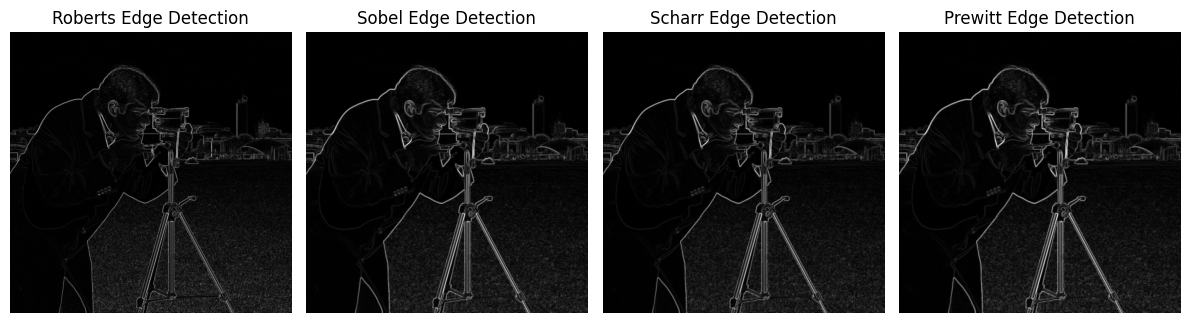

array([[0.00277297, 0.00392157, 0.00277297, ..., 0.00277297, 0.        ,
        0.        ],
       [0.00277297, 0.        , 0.00392157, ..., 0.        , 0.        ,
        0.        ],
       [0.00392157, 0.00277297, 0.00277297, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00620054, 0.00999808, ..., 0.09998077, 0.12863702,
        0.08235294],
       [0.        , 0.00620054, 0.00876889, ..., 0.03233808, 0.04960436,
        0.0745098 ],
       [0.        , 0.00784314, 0.00784314, ..., 0.00392157, 0.01176471,
        0.        ]])

In [13]:
from skimage.data import camera
from skimage.filters import roberts, sobel, sobel_h, sobel_v, scharr, \
    scharr_h, scharr_v, prewitt, prewitt_v, prewitt_h

def features_edge(image):
    edge_roberts = roberts(image)
    edge_sobel = sobel(image)
    edge_scharr = scharr(image)
    edge_prewitt = prewitt(image)

    fig, ax = plt.subplots(ncols=4, sharex=True, sharey=True,
                           figsize=(12, 10))

    ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
    ax[0].set_title('Roberts Edge Detection')

    ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
    ax[1].set_title('Sobel Edge Detection')

    ax[2].imshow(edge_scharr, cmap=plt.cm.gray)
    ax[2].set_title('Scharr Edge Detection')
    
    ax[3].imshow(edge_prewitt, cmap=plt.cm.gray)
    ax[3].set_title('Prewitt Edge Detection')

    for a in ax:
        a.axis('off')

    plt.tight_layout()
    plt.show()
    
    return edge_roberts


# Must call on 2D image
grey = camera()  # Load a sample grayscale image
features_edge(grey)  # Call the features_edge function with the grayscale image


In [5]:
from skimage.feature import hog
from skimage import data, exposure
    
def features_hog(image):
    features = hog(image, orientations=9,
                pixels_per_cell=(10, 10), cells_per_block=(2, 2),
                transform_sqrt=True, block_norm="L1")

    
    return features

this function features_hog takes an image as input and computes its HOG features using parameters specified within the function. It then returns these features.


In [6]:
# Convert OpenCV images to numpy arrays for training
train_data = []

for image in train_images:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (300, 300))
    
    features = features_hog(image)
    train_data.append(features)

(trainX, trainY) = (np.array(train_data), np.array(train_labels))

this part prepares a set of training images by converting them to grayscale, resizing them, extracting HOG features, and organizing the data into numpy arrays suitable for training a machine learning model.


In [7]:
test_data = []

for image in test_images:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (300, 300))
    
    features = features_hog(image)
    test_data.append(features)

(testX, testY) = (np.array(test_data), np.array(test_labels))
    
print(trainX.shape)
print(trainY.shape)
print(testX.shape)

(72, 30276)
(72,)
(30, 30276)


this is also the same prepares testing images by converting them to grayscale, resizing them, extracting HOG features, and organizing the data into numpy arrays suitable for training a machine learning model.


## Evaluate Models


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, trainX, trainY, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.725000 (0.158154)
LDA: 0.698214 (0.172476)


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Use

KNN: 0.642857 (0.169031)
RFC: 0.694643 (0.170991)
CART: 0.582143 (0.200796)
NB: 0.780357 (0.122175)
SVM: 0.480357 (0.107277)


In [9]:
from sklearn.model_selection import GridSearchCV

# Define a dictionary of hyperparameters for each classifier
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_lda = {}
param_grid_knn = {'n_neighbors': range(1, 21)}
param_grid_rfc = {'n_estimators': [100, 200, 250, 300], 'max_depth': [5, 8, 10, 15]}
param_grid_cart = {'max_depth': [5, 8, 10, 15]}
param_grid_nb = {}
param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': ['scale', 'auto']}

# Define a list of tuples containing the model name and corresponding hyperparameter grid
param_grids = [
    ('LR', LogisticRegression(solver='liblinear', multi_class='ovr'), param_grid_lr),
    ('LDA', LinearDiscriminantAnalysis(), param_grid_lda),
    ('KNN', KNeighborsClassifier(), param_grid_knn),
    ('RFC', RandomForestClassifier(), param_grid_rfc),
    ('CART', DecisionTreeClassifier(), param_grid_cart),
    ('NB', GaussianNB(), param_grid_nb),
    ('SVM', SVC(), param_grid_svm)
]

# Iterate over each model and perform hyperparameter tuning using grid search
results = []
for name, model, param_grid in param_grids:
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='accuracy')
    grid_search.fit(trainX, trainY)
    
    # Print the best hyperparameters found by grid search
    print(f"Best hyperparameters for {name}: {grid_search.best_params_}")



Best hyperparameters for LR: {'C': 0.1}
Best hyperparameters for LDA: {}
Best hyperparameters for KNN: {'n_neighbors': 1}
Best hyperparameters for RFC: {'max_depth': 15, 'n_estimators': 250}
Best hyperparameters for CART: {'max_depth': 15}
Best hyperparameters for NB: {}
Best hyperparameters for SVM: {'C': 10, 'gamma': 'scale'}


This process allows for the comparison of multiple machine learning algorithms to determine which one performs best on the provided training data. The evaluation metrics used here are accuracy, which represents the proportion of correctly classified instances.


In [38]:
# Make predictions on validation dataset
model = RandomForestClassifier(n_estimators=250, max_depth=8)

model.fit(trainX, trainY)
predictions = model.predict(testX)

In [39]:
# Evaluate predictions
print(accuracy_score(testY, predictions))
print(confusion_matrix(testY, predictions))
print(classification_report(testY, predictions))

0.8
[[12  3]
 [ 3 12]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.80      0.80      0.80        15

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30



In [16]:
# import joblib
# joblib.dump(model, "model.pkl")

['model.pkl']